In [1]:
%reload_ext autoreload
%autoreload 2
import os
from pathlib import Path
import numpy as np
import pandas as pd
from aldiscore.prediction import utils
from aldiscore import ROOT, RSTATE

In [2]:
data_dir = Path("/hits/fast/cme/bodynems/data/paper")

feat_df, *_ = utils.load_features(
    data_dir, include_features=["is_dna", "num_seqs", "seq_length"]
)

methods = ["dpos", "pythia"]
data = {m: [] for m in methods}
pythia_list = []
for source in os.listdir(data_dir):
    label_df = pd.read_parquet(data_dir / source / "stats.parquet")
    for method in methods:
        scores = label_df[["mean"]].query(f"method == '{method}'").droplevel(2)
        data[method].append(scores)


plot_df = pd.concat(data["dpos"])
plot_df["pythia"] = pd.concat(data["pythia"])
plot_df.columns = ["dpos", "pythia"]
print(plot_df.shape)
plot_df = pd.concat([plot_df.loc[feat_df.index], feat_df], axis=1)


# plot_df = plot_df.reset_index().drop("dataset", axis=1)
# plot_df

Dropping 0 NaN rows...
(11436, 2)


In [32]:
plot_df[["dpos", "pythia"]].corr()

,dpos,pythia
dpos,1.000000,-0.203756
pythia,-0.203756,1.000000


Text(0.64, 0.7, '$r = \\text{-}0.20$')

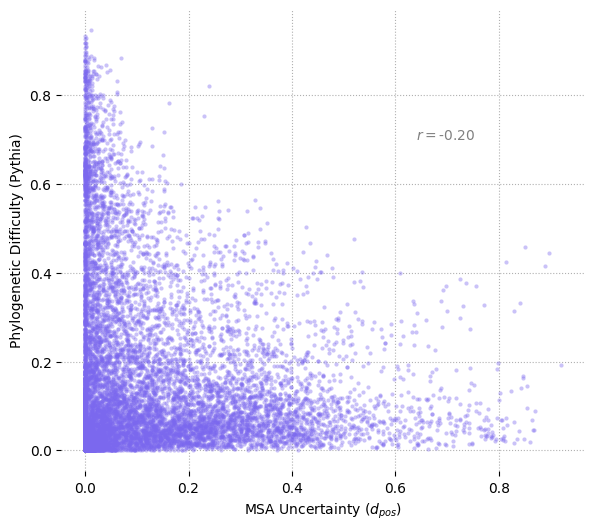

In [33]:
import matplotlib.pyplot as plt
import seaborn as sn

_STYLE = "darkgrid"
_RC = {"axes.facecolor": ".93", "axes.spines.right": False, "axes.spines.top": False}
# sn.reset_defaults()
# Pythia vs MSA Difficulty
fig = plt.figure(figsize=(6.75, 6))
fig.tight_layout()

ax = sn.scatterplot(
    plot_df,
    x="dpos",
    y="pythia",
    alpha=0.4,
    marker=".",
    # s=50,
    # size="num_seqs",
    linewidth=0,
    zorder=2,
    # hue=plot_df[["max.seq_length", "num_seqs"]].prod(axis=1),
    # palette="rocket",
    # sizes=(50, 500),
    # hue="is_dna",
    color="mediumslateblue",
)
ax.grid(linestyle=":")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
# ax.plot([0, 1], [1, 0], linestyle="-", color="grey", alpha=0.5, linewidth=0.5)

ax.set_xlabel(r"MSA Uncertainty ($d_{pos}$)")
ax.set_ylabel("Phylogenetic Difficulty (Pythia)")

ax.text(0.64, 0.7, r"$r = \text{-}0.20$", {"color": "grey"})
# fig.savefig(ROOT.parent / "figures" / "dpos_vs_pythia.svg", bbox_inches="tight")